In [4]:
# This program plots model components obtained from spectral decomposition
# of DR14 quasars by Rakshit et al. 2020, ApJS
# Contact: Suvendu Rakshit. Email: suvenduat@gmail.com


import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import glob
from mpl_toolkits.axes_grid1 import make_axes_locatable


# Put SDSS ID below as shown. For multiple IDs run in a loop.  
sdss_id_dr14= "1378-53061-0574"  
#sdss_id_dr14 ="7665-57328-0863"

## model directory  
modeldir="./"

## Search and read for the FITS file:
files  = glob.glob(modeldir+sdss_id_dr14+'_model.fits')[0]

print "files:", files

files: ./1378-53061-0574_model.fits


In [5]:
model1 = fits.open(files)
model  = model1[1].data

## model_pl_bc= Power law + Balmer component
model_pl_bc   = model['model_pl_bc']

# model_feii  = Fe II UV + Fe II OP
model_feii    = model['model_feii']

model_cont    = model_pl_bc + model_feii
model_tot     = model_cont  + model['model_line_bc'] + model['model_line_nc']

# Check if host galaxy is decomposed:
if np.max(model['model_host']>0):
    flux = model['flux']-model['model_host']
    figsize=(6,7)
else:
    flux    = model['flux']
    figsize=(6,5)


## Calculate the residual:
residual      = flux - model_tot

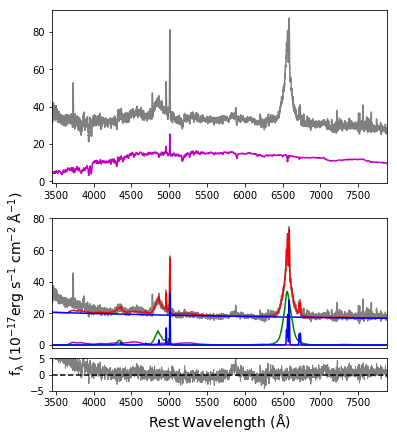

In [7]:
## Plot the spectral component:  
plt.figure(figsize=figsize)
if np.max(model['model_host'])>0:
   ax1=plt.subplot(211)
   plt.step(model['wave'], model['flux'], 'gray')
   plt.plot(model['wave'], model['model_host'], 'm-')
   plt.xlim(np.min(model['wave']), np.max(model['wave']))
   axn=plt.subplot(212)
   plt.step(model['wave'], model['flux']-model['model_host'], 'gray')
   plt.xlim(np.min(model['wave']), np.max(model['wave']))
else:
   axn=plt.subplot(111)
   plt.step(model['wave'], model['flux'], 'gray')

plt.plot(model['wave'], model_tot,   'r-')
plt.plot(model['wave'], model_pl_bc, 'b-')
plt.plot(model['wave'], model_feii,  'm-')
plt.plot(model['wave'], model['model_line_bc'], 'g-')
plt.plot(model['wave'], model['model_line_nc'], 'b-')
axn.set_ylim(-2, 1.1*np.max(model_tot))
plt.xlim(np.min(model['wave']), np.max(model['wave']))

## Plot residual:
divider = make_axes_locatable(axn)
ax2n = divider.append_axes("bottom", size="25%", pad=0.14)
axn.figure.add_axes(ax2n)
ax2n.plot(model['wave'], residual/model['err'],'gray', lw=1) # residual in the unit of flux uncertainity
ax2n.axhline(0, ls='--', c='k')
ax2n.set_xlim(np.min(model['wave']), np.max(model['wave']))
ax2n.yaxis.set_tick_params(labelsize=10)
ax2n.set_ylim(-5,5)
axn.set_xticks([])
plt.xlabel(r'$\rm Rest \, Wavelength$ ($\rm \AA$)', fontsize = 14)
axn.set_ylabel(r'$\rm f_{\lambda}$ ($\rm 10^{-17} erg\;s^{-1}\;cm^{-2}\;\AA^{-1}$)', fontsize = 14)  

## Show plot:
plt.show(block=False)